In [94]:
import tensorflow as tf
import tensorflow.keras.layers as layer
import matplotlib.pyplot as plt

In [95]:
mnist = tf.keras.datasets.mnist.load_data()

In [96]:
(x_train,y_train),(x_test,y_test) = mnist

In [97]:
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

In [98]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype='int')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype='int')

In [99]:
def cnn_model():

    inputs = tf.keras.Input(shape=(28,28,1))
    x = layer.Conv2D(filters=16,kernel_size=3, activation='relu')(inputs)
    x = layer.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
    x = layer.MaxPool2D()(x)
    x = layer.Flatten()(x)
    x = layer.Dense(units=100,activation='relu')(x)
    x = layer.Dense(units=10,activation='softmax')(x)
    cnn = tf.keras.Model(inputs, x)

    return cnn

In [100]:
model = cnn_model()

In [101]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='SGD',  metrics=['accuracy'])

In [102]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=[x_test,y_test])

Epoch 1/10
938/938 [==============================] - 28s 29ms/step - loss: 0.7116 - accuracy: 0.8878 - val_loss: 0.1404 - val_accuracy: 0.9575
Epoch 2/10
938/938 [==============================] - 29s 31ms/step - loss: 0.1071 - accuracy: 0.9661 - val_loss: 0.0985 - val_accuracy: 0.9706
Epoch 3/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0741 - val_accuracy: 0.9763
Epoch 4/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0780 - val_accuracy: 0.9756
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0657 - val_accuracy: 0.9797
Epoch 6/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0715 - val_accuracy: 0.9793
Epoch 7/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0726 - val_accuracy:

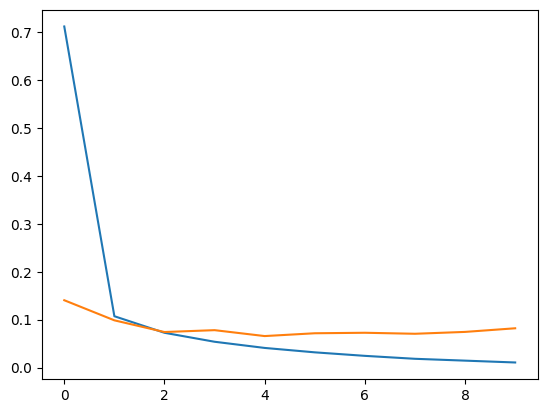

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [105]:
sample = tf.expand_dims(x_train[55], axis=0)

In [106]:
int_model = tf.keras.Model(model.input, model.layers[1].output)

In [107]:
int_sample = int_model(sample)

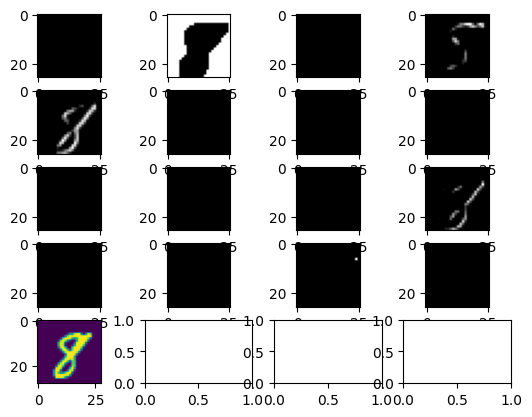

In [113]:
figure, axis = plt.subplots(5, 4)

for i in range(4):
    for j in range(4):
        s = i*4 + j
        axis[i, j].imshow(int_sample[0][:,:,s], cmap='gray')

axis[4,0].imshow(sample[0][:,:,0])


In [147]:
int_model_1 = tf.keras.Model(model.input, model.layers[2].output)

In [148]:
int_sample_1 = int_model_1(sample)

NameError: name 'int_sample_1' is not defined

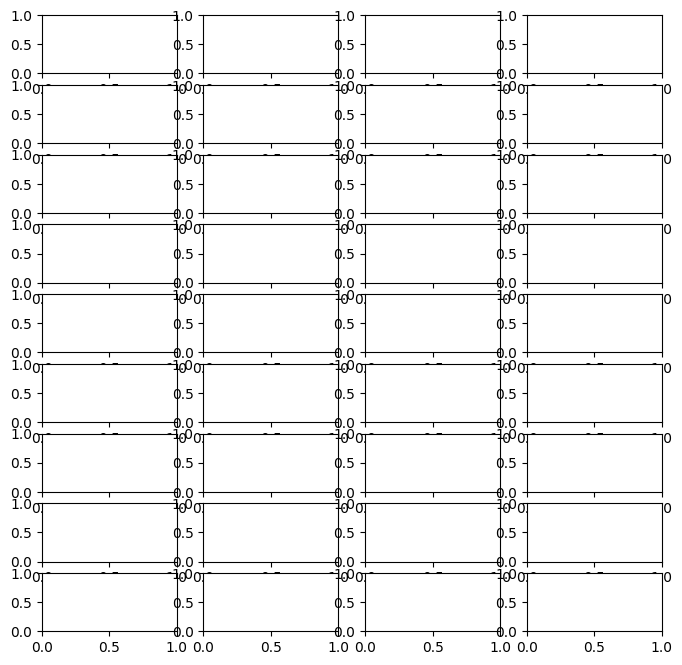

In [93]:
figure, axis = plt.subplots(9, 4,  figsize=(8, 8))

for i in range(8):
    for j in range(4):
        s = i*4 + j
        axis[i, j].imshow(normalize_2d(int_sample_1[0][:,:,s].numpy()))

axis[8,0].imshow(sample[0][:,:,0])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
a = np.array([[0,0,0,0,1,1,1,1],
              [0,0,0,0,1,1,1,1],
              [0,0,0,0,1,1,1,1],
              [0,0,0,0,1,1,1,1],
              [0,0,0,0,1,1,1,1],
              [1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1,1]])

In [33]:
b = np.array([[0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0],
     [1,1,1,0,0,0],
     [1,1,1,0,0,0],
     [0,0,0,0,0,0]])

c= np.array([[0,0,1,1,0,0],
     [0,0,1,1,0,0],
     [0,0,1,1,0,0],
     [0,0,1,1,0,0],
     [0,0,1,1,0,0],
     [0,0,1,1,0,0]])


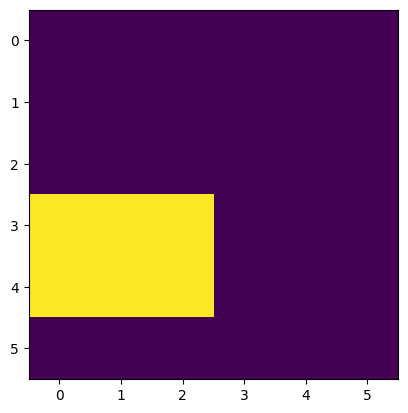

In [32]:
plt.imshow(b)

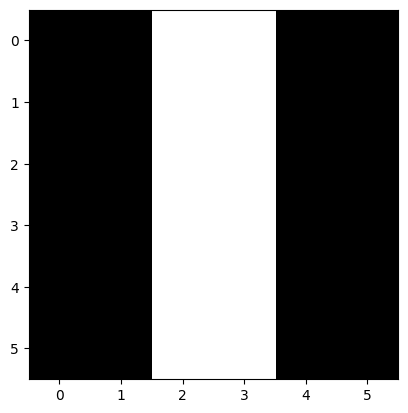

In [35]:
plt.imshow(c,cmap='gray')

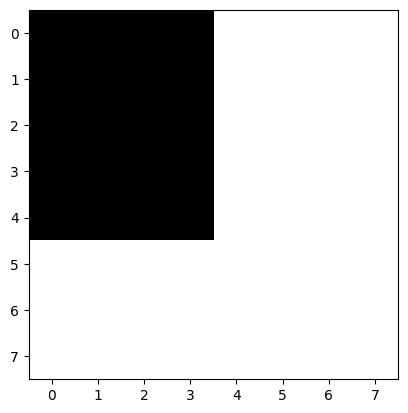

In [27]:
plt.imshow(a,  cmap='gray', vmin=0, vmax=1)

In [109]:
from scipy.ndimage import convolve


In [110]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

In [85]:
mat = x_train[1000][:,:,0].numpy()
mat = normalize_2d(mat)
kernel1 = [[-1,0,1],
          [-1,0,1],
          [-1,0,1]]
kernel2 = [[-1,-1,-1],
          [0,0,0],
          [1,1,1]]

In [86]:
mat1 = convolve(mat,kernel1)
mat2 = convolve(mat,kernel2)

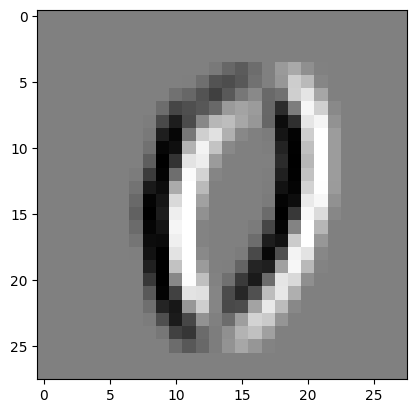

In [92]:
plt.imshow(mat1, cmap='gray')

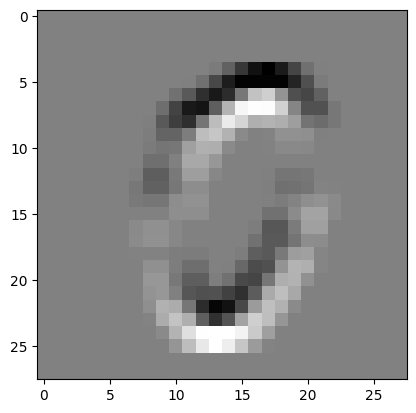

In [90]:
plt.imshow(mat2,cmap='gray')

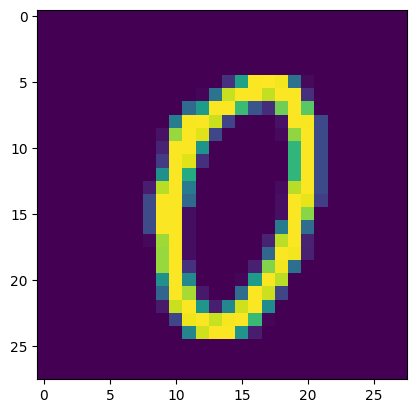

In [89]:
plt.imshow(mat)